In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Navigate to the "helmet" folder
%cd /content/drive/MyDrive/Helmet

/content/drive/MyDrive/Helmet


In [ ]:
# Check the contents of the "helmet" folder
%ls

Test/  Train/


In [ ]:
# Define paths for train and test data
train_path = 'Train'
test_path = 'Test'

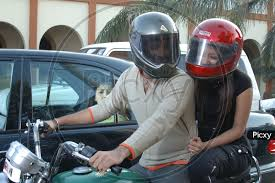

Image shape: (183, 275, 3)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Assuming the image is located at "/Train/Yes/image0.jpeg"
image_path = f'{train_path}/Yes/image0.jpeg'

# Read the image using OpenCV
img = cv2.imread(image_path)

# Check if the image is loaded successfully
if img is not None:
    # Display the image
    cv2_imshow(img)

    # Display the shape of the image
    print("Image shape:", img.shape)
else:
    print("Error loading image.")


In [ ]:
img.shape

(183, 275, 3)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [ ]:
model = Sequential()

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(183,275,3)))


model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))


model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))

model.add(Flatten())

model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))

model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 181, 273, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 179, 271, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 135, 64)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 87, 133, 32)       18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 66, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 90816)             0

In [ ]:
model.compile(loss = "binary_crossentropy" ,optimizer = "SGD" ,metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale =1./255,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'

)
test_datagen = ImageDataGenerator(
                    rescale =1./255,

)

train_generator = train_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',
    batch_size=32,
    target_size=(183,275),
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(183,275),
    class_mode='categorical',
    shuffle=True
)



Found 58 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping



# Set up EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[early_stopping],
)


Epoch 1/20
2/2 [==============================] - 5s 3s/step - loss: 0.6686 - accuracy: 0.6379 - val_loss: 0.6664 - val_accuracy: 0.7586
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 0.6768 - accuracy: 0.6207 - val_loss: 0.6649 - val_accuracy: 0.7414
Epoch 3/20
2/2 [==============================] - 2s 2s/step - loss: 0.6708 - accuracy: 0.7069 - val_loss: 0.6619 - val_accuracy: 0.6552
Epoch 4/20
2/2 [==============================] - 2s 2s/step - loss: 0.6668 - accuracy: 0.6897 - val_loss: 0.6600 - val_accuracy: 0.6724
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 0.6590 - accuracy: 0.6897 - val_loss: 0.6573 - val_accuracy: 0.6897
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.6634 - accuracy: 0.6207 - val_loss: 0.6554 - val_accuracy: 0.7586
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.6761 - accuracy: 0.6552 - val_loss: 0.6542 - val_accuracy: 0.5690
Epoch 8/20
2/2 [=========================

In [ ]:

test_img = cv2.imread(f'{test_path}/Yes/image6.jpeg')

test_img = cv2.resize(test_img,(183,275))
test_input1 = test_img.reshape((1,183,275,3))
prediction = model.predict(test_input1)
pred_label = np.argmax(prediction)
print(pred_label)


1/1 [==============================] - 0s 18ms/step
1


In [ ]:
import os
folder = f'{test_path}'
sub_folder = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder,name))]


In [ ]:
sub_folder[1]


'Yes'